# Finding mRNA versus protein correlation for a single gene

In [1]:
import cptac
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import Delta_Correlation as dc

In [2]:
luad = cptac.Luad()

In [3]:
def annotate(data, **kws): #Function to annotate the correlation of each plot in the plot
    r, p = scipy.stats.spearman(data['Protein Abundance'], data['RNA Abundance'])
    ax = plt.gca()
    ax.text(.05, .8, 'corr= {:.3f}'.format(r),
            transform=ax.transAxes)
    ax.set(xlabel='common xlabel', ylabel='common ylabel')


In [4]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/humbertogiraldez/Documents/GitHub/pancancerProteinMRNA/notebook_steps/Delta_Correlation.py, line 26)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/humbertogiraldez/Documents/GitHub/pancancerProteinMRNA/notebook_steps/Delta_Correlation.py, line 36)


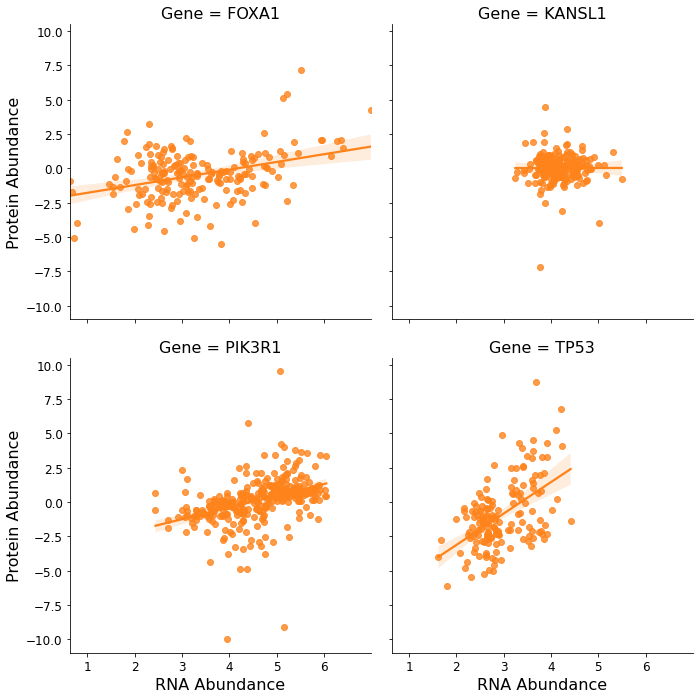

In [5]:
genes = ['TP53','FOXA1','KANSL1','PIK3R1']
df = dc.get_prot_trans_df(luad)
df = df[df.Gene.isin(genes)]
plot = sns.lmplot(y="Proteomics", x="Transcriptomics", sharex= True, sharey = True, col="Gene", data=df, col_wrap=2,line_kws={'color': '#fe831b'}, scatter_kws={'color': '#fe831b'});
axes = plot.axes
plot.set_axis_labels("RNA Abundance", "Protein Abundance")
plot.tight_layout()
plt.savefig('Figures/Figure S1) Single gene correlations')
plt.show()

